# Machine Learning

## Fetching datasets

In [1]:
# You need an internet connection to fetch the data
# The commands will save most of the datasets
# used in the chapter into your work directory

In [2]:
import pickle
import urllib
from sklearn.datasets import fetch_mldata
from sklearn.datasets import load_svmlight_file
from sklearn.datasets import fetch_covtype
from sklearn.datasets import fetch_20newsgroups

In [3]:
mnist = fetch_mldata("MNIST original")
pickle.dump(mnist, open( "mnist.pickle", "wb" ))

In [4]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

target_page = 'http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/ijcnn1.bz2'
with urllib.request.urlopen(target_page) as response:
    with open('ijcnn1.bz2','wb') as W:
        W.write(response.read())

In [5]:
target_page = 'http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression/cadata'
cadata = load_svmlight_file(urllib.request.urlopen(target_page))
pickle.dump(cadata, open( "cadata.pickle", "wb" ))

In [6]:
covertype_dataset = fetch_covtype(random_state=101, shuffle=True)
pickle.dump(covertype_dataset, open( "covertype_dataset.pickle", "wb" ))

In [7]:
newsgroups_dataset = fetch_20newsgroups(shuffle=True, remove=('headers', 'footers', 'quotes'), random_state=6)
pickle.dump(newsgroups_dataset, open( "newsgroups_dataset.pickle", "wb" ))

## Linear and logistic regression

In [8]:
from sklearn.datasets import load_boston
boston = load_boston()
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(boston.data, 
                    boston.target, test_size=0.2, random_state=0)

In [9]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, Y_train)
Y_pred = regr.predict(X_test)
from sklearn.metrics import mean_absolute_error
print ("MAE", mean_absolute_error(Y_test, Y_pred))

MAE 3.84281058945049


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [10]:
%timeit regr.fit(X_train, Y_train) 

548 µs ± 27.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [11]:
import numpy as np
avg_price_house = np.average(boston.target)
high_priced_idx = (Y_train >= avg_price_house)
Y_train[high_priced_idx] = 1
Y_train[np.logical_not(high_priced_idx)] = 0
Y_train = Y_train.astype(np.int8)
high_priced_idx = (Y_test >= avg_price_house)
Y_test[high_priced_idx] = 1
Y_test[np.logical_not(high_priced_idx)] = 0
Y_test = Y_test.astype(np.int8)

In [12]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print (classification_report(Y_test, Y_pred))

             precision    recall  f1-score   support

          0       0.81      0.90      0.85        61
          1       0.82      0.68      0.75        41

avg / total       0.81      0.81      0.81       102



In [13]:
%timeit clf.fit(X_train, Y_train)

2.7 ms ± 199 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Naive Bayes

In [14]:
from sklearn import datasets
iris = datasets.load_iris()
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, 
                    iris.target, test_size=0.2, random_state=0)

In [15]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

In [16]:
from sklearn.metrics import classification_report
print (classification_report(Y_test, Y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.93      1.00      0.96        13
          2       1.00      0.83      0.91         6

avg / total       0.97      0.97      0.97        30



In [17]:
%timeit clf.fit(X_train, Y_train)

770 µs ± 42.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## K-nearest neighbours

In [18]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [19]:
#imports the mnist object 
# previously pickled and dumped to disk
import pickle
mnist = pickle.load(open( "mnist.pickle", "rb" ))

In [20]:
mnist.data, mnist.target = shuffle(mnist.data, mnist.target)

In [21]:
# We reduce the dataset size, otherwise it'll take too much time to run
mnist.data = mnist.data[:1000]
mnist.target = mnist.target[:1000]
X_train, X_test, Y_train, Y_test = train_test_split(mnist.data, 
                    mnist.target, test_size=0.8, random_state=0)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
# KNN: K=10, default measure of distance (euclidean)
clf = KNeighborsClassifier(3)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

In [23]:
from sklearn.metrics import classification_report
print (classification_report(Y_test, Y_pred))

             precision    recall  f1-score   support

        0.0       0.84      0.84      0.84        91
        1.0       0.60      1.00      0.75        87
        2.0       0.82      0.51      0.63        72
        3.0       0.77      0.85      0.81        75
        4.0       0.73      0.62      0.67        85
        5.0       0.76      0.75      0.75        67
        6.0       0.85      0.85      0.85        71
        7.0       0.77      0.76      0.76        78
        8.0       0.89      0.61      0.72        82
        9.0       0.66      0.66      0.66        92

avg / total       0.76      0.75      0.74       800



In [24]:
%timeit clf.fit(X_train, Y_train)

1.53 ms ± 182 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [25]:
%timeit clf.predict(X_test)

169 ms ± 4.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Advanced non linear algorithms

### SVM for classification

In [26]:
from sklearn.datasets import load_svmlight_file
X_train, y_train = load_svmlight_file('ijcnn1.bz2')
first_rows = 2500
X_train, y_train = X_train[:first_rows,:], y_train[:first_rows]

In [27]:
import numpy as np
from sklearn.cross_validation import cross_val_score
from sklearn.svm import SVC
hypothesis = SVC(kernel='rbf', random_state=101)
scores = cross_val_score(hypothesis, X_train, y_train, cv=5, scoring='accuracy')
print ("SVC with rbf kernel -> cross validation accuracy: mean = %0.3f \
std = %0.3f" % (np.mean(scores), np.std(scores)))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


SVC with rbf kernel -> cross validation accuracy: mean = 0.910 std = 0.001


In [28]:
import pickle
covertype_dataset = pickle.load(open( "covertype_dataset.pickle", "rb" ))
covertype_X = covertype_dataset.data[:25000,:]
covertype_y = covertype_dataset.target[:25000] -1 

In [29]:
import numpy as np
covertypes = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 
        'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']
print ('original dataset:', covertype_dataset.data.shape)
print ('sub-sample:', covertype_X.shape)
print('target freq:', list(zip(covertypes,np.bincount(covertype_y))))

original dataset: (581012, 54)
sub-sample: (25000, 54)
target freq: [('Spruce/Fir', 9107), ('Lodgepole Pine', 12122), ('Ponderosa Pine', 1583), ('Cottonwood/Willow', 120), ('Aspen', 412), ('Douglas-fir', 779), ('Krummholz', 877)]


In [30]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.svm import LinearSVC
hypothesis = LinearSVC(dual=False, class_weight='balanced')
cv_strata = StratifiedKFold(covertype_y, n_folds=3, shuffle=True, random_state=101)
scores = cross_val_score(hypothesis, covertype_X, covertype_y, cv=cv_strata, scoring='accuracy')
print ("LinearSVC -> cross validation accuracy: mean = %0.3f \
std = %0.3f" % (np.mean(scores), np.std(scores)))

LinearSVC -> cross validation accuracy: mean = 0.656 std = 0.015


### SVM for regression

In [31]:
import pickle
X_train, y_train = pickle.load(open( "cadata.pickle", "rb" ))
from sklearn.preprocessing import scale
first_rows = 2000
X_train = scale(X_train[:first_rows,:].toarray())
y_train = y_train[:first_rows]/10**4.0

In [32]:
import numpy as np
from sklearn.cross_validation import cross_val_score
from sklearn.svm import SVR
hypothesis = SVR()
scores = cross_val_score(hypothesis, X_train, y_train, cv=3, 
                        scoring='neg_mean_absolute_error')
print ("SVR -> cross validation accuracy: mean = %0.3f \
std = %0.3f" % (np.mean(scores), np.std(scores)))

SVR -> cross validation accuracy: mean = -4.618 std = 0.347


### Tuning SVM

In [33]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
X_train, y_train = load_svmlight_file('ijcnn1.bz2')
first_rows = 2500
X_train, y_train = X_train[:first_rows,:], y_train[:first_rows]
hypothesis = SVC(kernel='rbf', random_state=101)
search_dict = {'C': [0.01, 0.1, 1, 10, 100], 
               'gamma': [0.1, 0.01, 0.001, 0.0001]}
search_func = RandomizedSearchCV(estimator=hypothesis, 
              param_distributions=search_dict, n_iter=10, scoring='accuracy',
              n_jobs=-1, iid=True, refit=True, cv=5, random_state=101)
search_func.fit(X_train, y_train)
print ('Best parameters %s' % search_func.best_params_)
print ('Cross validation accuracy: mean = %0.3f' % search_func.best_score_)

Best parameters {'gamma': 0.1, 'C': 100}
Cross validation accuracy: mean = 0.998


## Ensemble strategies

In [34]:
import pickle
covertype_dataset = pickle.load(open( "covertype_dataset.pickle", "rb" ))
print (covertype_dataset.DESCR)
covertype_X = covertype_dataset.data[:15000,:]
covertype_y = covertype_dataset.target[:15000]
covertypes = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 
        'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']

Forest covertype dataset.

A classic dataset for classification benchmarks, featuring categorical and
real-valued features.

The dataset page is available from UCI Machine Learning Repository

    http://archive.ics.uci.edu/ml/datasets/Covertype

Courtesy of Jock A. Blackard and Colorado State University.



### Bagging with weak ensembles

In [35]:
import numpy as np
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
hypothesis = BaggingClassifier(KNeighborsClassifier(n_neighbors=1), 
            max_samples=0.7, max_features=0.7, n_estimators=100)
scores = cross_val_score(hypothesis, covertype_X, covertype_y, cv=3, 
                         scoring='accuracy', n_jobs=-1)
print ("BaggingClassifier -> cross validation accuracy: mean = %0.3f \
std = %0.3f" % (np.mean(scores), np.std(scores)))

BaggingClassifier -> cross validation accuracy: mean = 0.795 std = 0.002


### Random Forests and Extra-Trees

In [36]:
import numpy as np
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [37]:
%%time
hypothesis = RandomForestClassifier(n_estimators=100, random_state=101)
scores = cross_val_score(hypothesis, covertype_X, covertype_y, 
                         cv=3, scoring='accuracy', n_jobs=-1)
print ("RandomForestClassifier -> cross validation accuracy: mean = %0.3f \
std = %0.3f" % (np.mean(scores), np.std(scores)))

RandomForestClassifier -> cross validation accuracy: mean = 0.809 std = 0.009
CPU times: user 112 ms, sys: 88.2 ms, total: 201 ms
Wall time: 2.3 s


In [38]:
%%time
hypothesis = ExtraTreesClassifier(n_estimators=100, random_state=101)
scores = cross_val_score(hypothesis, covertype_X, covertype_y, cv=3, 
                         scoring='accuracy', n_jobs=-1)
print ("ExtraTreesClassifier -> cross validation accuracy: mean = %0.3f \
std = %0.3f" % (np.mean(scores), np.std(scores)))

ExtraTreesClassifier -> cross validation accuracy: mean = 0.821 std = 0.009
CPU times: user 103 ms, sys: 59.2 ms, total: 162 ms
Wall time: 2.26 s


In [39]:
import pickle
from sklearn.preprocessing import scale
X_train, y_train = pickle.load(open( "cadata.pickle", "rb" ))
first_rows = 2000

In [40]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
X_train = scale(X_train[:first_rows,:].toarray())
y_train = y_train[:first_rows]/10**4.
hypothesis = RandomForestRegressor(n_estimators=300, random_state=101)
scores = cross_val_score(hypothesis, X_train, y_train, cv=3, 
                         scoring='neg_mean_absolute_error', n_jobs=-1)
print ("RandomForestClassifier -> cross validation accuracy: mean = %0.3f \
std = %0.3f" % (np.mean(scores), np.std(scores)))

RandomForestClassifier -> cross validation accuracy: mean = -4.642 std = 0.514


### Estimating probabilities from an ensemble

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
hypothesis = RandomForestClassifier(n_estimators=100, random_state=101)
calibration = CalibratedClassifierCV(hypothesis, method='sigmoid', cv=5)
covertype_X = covertype_dataset.data[:15000,:]
covertype_y = covertype_dataset.target[:15000]
covertype_test_X = covertype_dataset.data[15000:25000,:]
covertype_test_y = covertype_dataset.target[15000:25000]

In [42]:
hypothesis.fit(covertype_X,covertype_y)
calibration.fit(covertype_X,covertype_y)
prob_raw = hypothesis.predict_proba(covertype_test_X)
prob_cal = calibration.predict_proba(covertype_test_X)

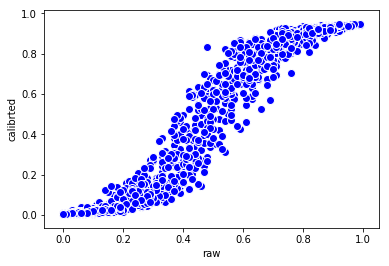

In [43]:
%matplotlib inline
tree_kind = covertypes.index('Ponderosa Pine')
probs = pd.DataFrame(list(zip(prob_raw[:,tree_kind],prob_cal[:,tree_kind])), 
        columns=['raw','calibrted'])
plot = probs.plot(kind='scatter', x=0, y=1, s=64, c='blue', edgecolors='white')

## Dealing with big data

### Creating some big datasets as examples

In [44]:
import numpy as np
import pickle
newsgroups_dataset = pickle.load(open( "newsgroups_dataset.pickle", "rb" ))
print ('Posts inside the data: %s' % np.shape(newsgroups_dataset.data))
print ('Average number of words for post:\
%0.0f' % np.mean([len(text.split(' ')) for text in newsgroups_dataset.data]))

Posts inside the data: 11314
Average number of words for post:206


In [45]:
# Attention this may take a while
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=10**5, n_features=5, 
                          n_informative=3, random_state=101)
D = np.c_[y,X]
np.savetxt('large_dataset_10__5.csv', D, delimiter=",") 
# the saved file should be around 14,6 MB
del(D, X, y)
X,y = make_classification(n_samples=10**6, n_features=5, 
                          n_informative=3, random_state=101)
D = np.c_[y,X]
np.savetxt('large_dataset_10__6.csv', D, delimiter=",") 
# the saved file should be around 146 MB
del(D, X, y)
X,y = make_classification(n_samples=10**7, n_features=5, 
                          n_informative=3, random_state=101)
D = np.c_[y,X]
np.savetxt('large_dataset_10__7.csv', D, delimiter=",") 
# the saved file should be around 1,46 GB
del(D, X, y)

### Scalability with volume

In [46]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
streaming = pd.read_csv('large_dataset_10__7.csv', 
                        header=None, chunksize=10000)
learner = SGDClassifier(loss='log', max_iter=100)
minmax_scaler = MinMaxScaler(feature_range=(0, 1))
cumulative_accuracy = list()
for n,chunk in enumerate(streaming):
    if n == 0:
            minmax_scaler.fit(chunk.iloc[:,1:].values)
    X = minmax_scaler.transform(chunk.iloc[:,1:].values)
    X[X>1] = 1
    X[X<0] = 0  
    y = chunk.iloc[:,0]
    if n > 8:
        cumulative_accuracy.append(learner.score(X,y))
    learner.partial_fit(X,y,classes=np.unique(y))
print ('Progressive validation mean accuracy \
%0.3f' % np.mean(cumulative_accuracy))

Progressive validation mean accuracy 0.708


## Keeping up with velocity

In [47]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
import pandas as pd
from datetime import datetime
classifiers  = {
'SGDClassifier hinge loss' : SGDClassifier(loss='hinge', random_state=101, max_iter=10),
'SGDClassifier log loss' : SGDClassifier(loss='log', random_state=101, max_iter=10),
'Perceptron' : Perceptron(random_state=101, max_iter=10),
'BernoulliNB' : BernoulliNB(),
'PassiveAggressiveClassifier' : PassiveAggressiveClassifier(random_state=101, max_iter=10)
}
large_dataset = 'large_dataset_10__6.csv'
for algorithm in classifiers:
    start = datetime.now()
    minmax_scaler = MinMaxScaler(feature_range=(0, 1))
    streaming = pd.read_csv(large_dataset, header=None, chunksize=100)
    learner = classifiers[algorithm]
    cumulative_accuracy = list()
    for n,chunk in enumerate(streaming):
        y = chunk.iloc[:,0]
        X = chunk.iloc[:,1:]
        if n > 50 :
            cumulative_accuracy.append(learner.score(X,y))
        learner.partial_fit(X,y,classes=np.unique(y))
    elapsed_time = datetime.now() - start
    print (algorithm + ' : mean accuracy %0.3f in %s secs' \
    % (np.mean(cumulative_accuracy),elapsed_time.total_seconds()))

SGDClassifier hinge loss : mean accuracy 0.748 in 35.601844 secs
SGDClassifier log loss : mean accuracy 0.740 in 38.099721 secs
Perceptron : mean accuracy 0.674 in 36.582307 secs
BernoulliNB : mean accuracy 0.650 in 41.654515 secs
PassiveAggressiveClassifier : mean accuracy 0.715 in 36.651248 secs


### Dealing with variety

In [48]:
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import HashingVectorizer
def streaming():
    for response, item in zip(newsgroups_dataset.target, newsgroups_dataset.data):
        yield response, item
hashing_trick = HashingVectorizer(stop_words='english', norm = 'l2')
learner = SGDClassifier(random_state=101, max_iter=10)
texts = list()
targets = list()
for n,(target, text) in enumerate(streaming()):
    texts.append(text)
    targets.append(target)
    if n % 1000 == 0 and n >0:
        learning_chunk = hashing_trick.transform(texts)
        if n > 1000:
            last_validation_score = learner.score(learning_chunk, targets),
        learner.partial_fit(learning_chunk, targets, classes=[k for k in range(20)])
        texts, targets = list(), list()
print ('Last validation score: %0.3f' % last_validation_score)

Last validation score: 0.713


In [49]:
New_text = ['A 2014 red Toyota Prius v Five with fewer than 14K miles. Powered by a reliable 1.8L four cylinder hybrid engine that averages 44mpg in the city and 40mpg on the highway.']
text_vector = hashing_trick.transform(New_text)
print (np.shape(text_vector), type(text_vector))
print ('Predicted newsgroup: %s' % newsgroups_dataset.target_names[learner.predict(text_vector)[0]])

(1, 1048576) <class 'scipy.sparse.csr.csr_matrix'>
Predicted newsgroup: rec.autos


## A peek of NLP

### Word tokenisation

In [50]:
my_text = "The sexy job in the next 10 years will be statisticians. People think I'm joking, but who would've guessed that computer engineers would've been the sexy job of the 1990s?"
simple_tokens = my_text.split(' ')
print (simple_tokens)

['The', 'sexy', 'job', 'in', 'the', 'next', '10', 'years', 'will', 'be', 'statisticians.', 'People', 'think', "I'm", 'joking,', 'but', 'who', "would've", 'guessed', 'that', 'computer', 'engineers', "would've", 'been', 'the', 'sexy', 'job', 'of', 'the', '1990s?']


Executing this or other nltk package calls, 
In case of an error saying: “Resource u'tokenizers/punkt/english.pickle' not found.”,
just write on your console: nltk.download() 
and select to download everything or just to browse for the missing resource that triggered the warning.

In [51]:
import nltk
nltk_tokens = nltk.word_tokenize(my_text)
print (nltk_tokens)

['The', 'sexy', 'job', 'in', 'the', 'next', '10', 'years', 'will', 'be', 'statisticians', '.', 'People', 'think', 'I', "'m", 'joking', ',', 'but', 'who', 'would', "'ve", 'guessed', 'that', 'computer', 'engineers', 'would', "'ve", 'been', 'the', 'sexy', 'job', 'of', 'the', '1990s', '?']


In [52]:
from nltk.tokenize import TweetTokenizer
tt = TweetTokenizer(strip_handles=True, reduce_len=True)

tweet = '@mate: I loooooooove this city!!!!!!! #love #foreverhere'
tt.tokenize(tweet)

[':', 'I', 'looove', 'this', 'city', '!', '!', '!', '#love', '#foreverhere']

### Stemming

In [53]:
from nltk.stem import *
stemmer = LancasterStemmer()
print ([stemmer.stem(word) for word in nltk_tokens])

['the', 'sexy', 'job', 'in', 'the', 'next', '10', 'year', 'wil', 'be', 'stat', '.', 'peopl', 'think', 'i', "'m", 'jok', ',', 'but', 'who', 'would', "'ve", 'guess', 'that', 'comput', 'engin', 'would', "'ve", 'been', 'the', 'sexy', 'job', 'of', 'the', '1990s', '?']


### Word Tagging

In [54]:
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/albertoboschetti/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [55]:
print (nltk.pos_tag(nltk_tokens))

[('The', 'DT'), ('sexy', 'JJ'), ('job', 'NN'), ('in', 'IN'), ('the', 'DT'), ('next', 'JJ'), ('10', 'CD'), ('years', 'NNS'), ('will', 'MD'), ('be', 'VB'), ('statisticians', 'NNS'), ('.', '.'), ('People', 'NNS'), ('think', 'VBP'), ('I', 'PRP'), ("'m", 'VBP'), ('joking', 'VBG'), (',', ','), ('but', 'CC'), ('who', 'WP'), ('would', 'MD'), ("'ve", 'VBP'), ('guessed', 'VBN'), ('that', 'IN'), ('computer', 'NN'), ('engineers', 'NNS'), ('would', 'MD'), ("'ve", 'VBP'), ('been', 'VBN'), ('the', 'DT'), ('sexy', 'JJ'), ('job', 'NN'), ('of', 'IN'), ('the', 'DT'), ('1990s', 'CD'), ('?', '.')]


### Named Entity Recognition

In [56]:
text = "Elvis Aaron Presley was an American singer and actor. Born in Tupelo, Mississippi, when Presley was 13 years old he and his family relocated to Memphis, Tennessee."
chunks = nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(text)))
print (chunks)

(S
  (PERSON Elvis/NNP)
  (PERSON Aaron/NNP Presley/NNP)
  was/VBD
  an/DT
  (GPE American/JJ)
  singer/NN
  and/CC
  actor/NN
  ./.
  Born/VBN
  in/IN
  (GPE Tupelo/NNP)
  ,/,
  (GPE Mississippi/NNP)
  ,/,
  when/WRB
  (PERSON Presley/NNP)
  was/VBD
  13/CD
  years/NNS
  old/JJ
  he/PRP
  and/CC
  his/PRP$
  family/NN
  relocated/VBD
  to/TO
  (GPE Memphis/NNP)
  ,/,
  (GPE Tennessee/NNP)
  ./.)


### Stopwords

In [57]:
from sklearn.feature_extraction import text
stop_words = text.ENGLISH_STOP_WORDS
print (stop_words)

frozenset({'ltd', 'whoever', 'hereupon', 'of', 'under', 'anyway', 'a', 'therefore', 'several', 'bottom', 'else', 'mill', 'however', 're', 'twenty', 'he', 'his', 'forty', 'us', 'within', 'co', 'yourselves', 'because', 'full', 'wherever', 'it', 'further', 'beforehand', 'whom', 'in', 'whenever', 'nothing', 'yourself', 'mostly', 'first', 'down', 'own', 'therein', 'same', 'over', 'though', 'indeed', 'side', 'more', 'out', 'throughout', 'give', 'but', 'my', 'becoming', 'our', 'now', 'about', 'seeming', 'still', 'such', 'two', 'whole', 'is', 'anyhow', 'so', 'thus', 'find', 'how', 'no', 'moreover', 'across', 'per', 'above', 'without', 'after', 'for', 'into', 'who', 'only', 'are', 'which', 'behind', 'that', 'themselves', 'this', 'from', 'almost', 'put', 'serious', 'became', 'front', 'rather', 'show', 'least', 'via', 'onto', 'de', 'eight', 'five', 'somehow', 'be', 'would', 'become', 'perhaps', 'seemed', 'hers', 'her', 'what', 'sometime', 'all', 'among', 'besides', 'former', 'too', 'could', 'alth

In [58]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

In [59]:
print(stopwords.words('german'))

['aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an', 'ander', 'andere', 'anderem', 'anderen', 'anderer', 'anderes', 'anderm', 'andern', 'anderr', 'anders', 'auch', 'auf', 'aus', 'bei', 'bin', 'bis', 'bist', 'da', 'damit', 'dann', 'der', 'den', 'des', 'dem', 'die', 'das', 'daß', 'derselbe', 'derselben', 'denselben', 'desselben', 'demselben', 'dieselbe', 'dieselben', 'dasselbe', 'dazu', 'dein', 'deine', 'deinem', 'deinen', 'deiner', 'deines', 'denn', 'derer', 'dessen', 'dich', 'dir', 'du', 'dies', 'diese', 'diesem', 'diesen', 'dieser', 'dieses', 'doch', 'dort', 'durch', 'ein', 'eine', 'einem', 'einen', 'einer', 'eines', 'einig', 'einige', 'einigem', 'einigen', 'einiger', 'einiges', 'einmal', 'er', 'ihn', 'ihm', 'es', 'etwas', 'euer', 'eure', 'eurem', 'euren', 'eurer', 'eures', 'für', 'gegen', 'gewesen', 'hab', 'habe', 'haben', 'hat', 'hatte', 'hatten', 'hier', 'hin', 'hinter', 'ich', 'mich', 'mir', 'ihr', 'ihre', 'ihrem', 'ihren', 'ihrer', 'ihres', 'euch', 'im'

### A complete data science example: text classification

In [60]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_20newsgroups
categories = ['sci.med', 'sci.space']
to_remove = ('headers', 'footers', 'quotes')
twenty_sci_news_train = fetch_20newsgroups(subset='train', remove=to_remove, categories=categories)
twenty_sci_news_test = fetch_20newsgroups(subset='test', remove=to_remove, categories=categories)

In [61]:
tf_vect = TfidfVectorizer()
X_train = tf_vect.fit_transform(twenty_sci_news_train.data)
X_test = tf_vect.transform(twenty_sci_news_test.data)
Y_train = twenty_sci_news_train.target
Y_test = twenty_sci_news_test.target

In [62]:
clf = SGDClassifier(max_iter=100)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print ("Accuracy=", accuracy_score(Y_test, Y_pred))

Accuracy= 0.8987341772151899


In [63]:
def clean_and_stem_text(text):
    tokens = nltk.word_tokenize(text.lower())
    clean_tokens = [word for word in tokens if word not in stop_words]
    stem_tokens = [stemmer.stem(token) for token in clean_tokens]
    return " ".join(stem_tokens)
cleaned_docs_train = [clean_and_stem_text(text) for text in twenty_sci_news_train.data]
cleaned_docs_test = [clean_and_stem_text(text) for text in twenty_sci_news_test.data]

In [64]:
X1_train = tf_vect.fit_transform(cleaned_docs_train)
X1_test = tf_vect.transform(cleaned_docs_test)
clf.fit(X1_train, Y_train)
Y1_pred = clf.predict(X1_test)
print ("Accuracy=", accuracy_score(Y_test, Y1_pred))

Accuracy= 0.8911392405063291


## An overview of unsupervised learning

In [65]:
%matplotlib inline

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [67]:
N_samples = 2000
dataset_1 = np.array(datasets.make_circles(n_samples=N_samples, noise=0.05, factor=0.3)[0])
dataset_2 = np.array(datasets.make_blobs(n_samples=N_samples, centers=4, cluster_std=0.4, random_state=0)[0])

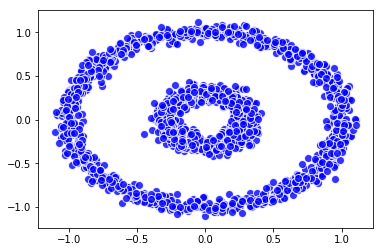

In [68]:
plt.scatter(dataset_1[:,0], dataset_1[:,1], c='blue', alpha=0.8, s=64, edgecolors='white')
plt.show()

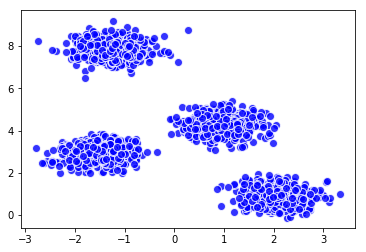

In [69]:
plt.scatter(dataset_2[:,0], dataset_2[:,1], alpha=0.8, s=64, c='blue', edgecolors='white')
plt.show()

In [70]:
from sklearn.cluster import KMeans
K_dataset_1 = 2
km_1 = KMeans(n_clusters=K_dataset_1)
labels_1 = km_1.fit(dataset_1).labels_

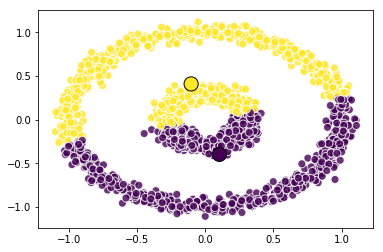

In [71]:
plt.scatter(dataset_1[:,0], dataset_1[:,1], c=labels_1, alpha=0.8, s=64, edgecolors='white')
plt.scatter(km_1.cluster_centers_[:,0], km_1.cluster_centers_[:,1], s=200, c=np.unique(labels_1), edgecolors='black')
plt.show()

In [72]:
K_dataset_2 = 4
km_2 = KMeans(n_clusters=K_dataset_2)
labels_2 = km_2.fit(dataset_2).labels_

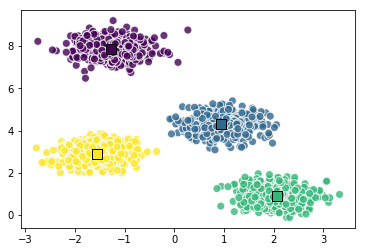

In [73]:
plt.scatter(dataset_2[:,0], dataset_2[:,1], c=labels_2, alpha=0.8, s=64, edgecolors='white')
plt.scatter(km_2.cluster_centers_[:,0], km_2.cluster_centers_[:,1], marker='s', s=100, c=np.unique(labels_2), edgecolors='black')
plt.show()

In [74]:
from sklearn.cluster import DBSCAN
dbs_1 = DBSCAN(eps=0.4)
labels_1 = dbs_1.fit(dataset_1).labels_

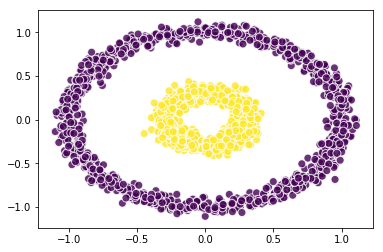

In [75]:
plt.scatter(dataset_1[:,0], dataset_1[:,1], c=labels_1, alpha=0.8, s=64, edgecolors='white')
plt.show()

In [76]:
np.unique(labels_1)

array([0, 1])

In [77]:
dbs_2 = DBSCAN(eps=0.5)
labels_2 = dbs_2.fit(dataset_2).labels_

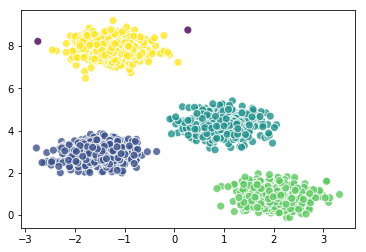

In [78]:
plt.scatter(dataset_2[:,0], dataset_2[:,1], c=labels_2, alpha=0.8, s=64, edgecolors='white')
plt.show()

In [79]:
np.unique(labels_2)

array([-1,  0,  1,  2,  3])

## LDA

In [80]:
import nltk
import gensim
from sklearn.datasets import fetch_20newsgroups

def tokenize(text):
    return [token.lower() for token in gensim.utils.simple_preprocess(text) 
            if token not in gensim.parsing.preprocessing.STOPWORDS]

text_dataset = fetch_20newsgroups(categories=['rec.autos', 
                                              'sci.med'], 
                                  random_state=101,
                                  remove=('headers', 'footers', 
                                          'quotes'))


documents = text_dataset.data
print("Document count:", len(documents))

Document count: 1188


In [81]:
documents[0]

'\nI have a new doctor who gave me a prescription today for something called \nSeptra DS.  He said it may cause GI problems and I have a sensitive stomach \nto begin with.  Anybody ever taken this antibiotic.  Any good?  Suggestions \nfor avoiding an upset stomach?  Other tips?\n'

In [82]:
processed_docs = [tokenize(doc) for doc in documents]
word_dic = gensim.corpora.Dictionary(processed_docs)
print("Num tokens:", len(word_dic))

Num tokens: 16161


In [83]:
word_dic.filter_extremes(no_below=10, no_above=0.2)
bow = [word_dic.doc2bow(doc) for doc in processed_docs]

In [84]:
lda_model = gensim.models.LdaModel(bow, num_topics=2, 
                                       id2word=word_dic, passes=10, 
                                       iterations=500)

In [85]:
lda_model.print_topics(-1)

[(0,
  '0.010*"health" + 0.009*"medical" + 0.009*"edu" + 0.008*"use" + 0.007*"patients" + 0.007*"new" + 0.007*"information" + 0.006*"disease" + 0.006*"research" + 0.005*"cancer"'),
 (1,
  '0.017*"car" + 0.009*"com" + 0.008*"think" + 0.008*"good" + 0.007*"edu" + 0.007*"people" + 0.007*"time" + 0.007*"cars" + 0.005*"ve" + 0.005*"right"')]

In [86]:
new_doc = "I've shown the doctor my new car. He loved its big wheels!"

bow_doc = word_dic.doc2bow(tokenize(new_doc))
for index, score in sorted(lda_model[bow_doc], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.8437982201576233	 Topic: 0.017*"car" + 0.009*"com" + 0.008*"think" + 0.008*"good" + 0.007*"edu"
Score: 0.1562017947435379	 Topic: 0.010*"health" + 0.009*"medical" + 0.009*"edu" + 0.008*"use" + 0.007*"patients"


# Word2Vec

In [87]:
from nltk.corpus import movie_reviews
from gensim.models import Word2Vec
w2v = Word2Vec(movie_reviews.sents(), workers=4)
w2v.init_sims(replace=True)

In [88]:
w2v.wv.most_similar('house', topn=5)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('hotel', 0.8681062459945679),
 ('wedding', 0.8588282465934753),
 ('apartment', 0.8586844801902771),
 ('country', 0.8571252226829529),
 ('body', 0.8569718599319458)]

In [89]:
w2v.wv.most_similar('countryside', topn=5)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('causing', 0.9501870274543762),
 ('farmers', 0.9442658424377441),
 ('paralyzed', 0.9441059827804565),
 ('motorcycle', 0.943734347820282),
 ('border', 0.9421277642250061)]

In [90]:
w2v.wv['countryside']

array([-0.12580296, -0.01552107, -0.1522047 ,  0.02448913, -0.0508785 ,
        0.00705858, -0.07796285,  0.0519166 ,  0.10179896, -0.08066345,
       -0.10956721, -0.01668025, -0.04301926, -0.12289333, -0.00182655,
        0.0738026 ,  0.00898191, -0.01614358,  0.11286344,  0.00790939,
       -0.02409439, -0.01796649,  0.02395251, -0.07235534, -0.07534969,
        0.18677276, -0.09077775,  0.18592946,  0.117225  ,  0.02340607,
        0.18767923, -0.08928166, -0.06844951, -0.03123406,  0.21749127,
       -0.06532606,  0.03579346,  0.02613759,  0.05484091, -0.11001825,
        0.09384581, -0.01723688,  0.05237632,  0.14616258,  0.02200264,
       -0.08449861,  0.02982996, -0.12073242, -0.02646325,  0.11971657,
       -0.13550365,  0.12332159, -0.00424201,  0.02878281, -0.02609161,
        0.0190105 ,  0.0352604 ,  0.09578709,  0.04800044,  0.18726519,
       -0.05004856,  0.06729621, -0.01880872,  0.07047137, -0.00061695,
       -0.10071348, -0.15024507, -0.22855459, -0.12078457,  0.06

In [91]:
w2v.wv.most_similar(positive=['woman', 'king'], negative=['queen'], topn=3)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('man', 0.8179256319999695),
 ('boy', 0.763951301574707),
 ('child', 0.7518927454948425)]

In [92]:
w2v.wv.doesnt_match(['bed', 'pillow', 'cake', 'mattress'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'cake'

In [93]:
w2v.wv.similarity('woman', 'girl'), w2v.wv.similarity('woman', 'boy')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


(0.91422737, 0.845719)